In [34]:
print "Importing packages..."
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import time
print "All packages imported."

Importing packages...
All packages imported.


In [41]:
property1 = "rmsd"
property2 = "dist614"
fe_cutoff = 10
sims = [0,4,19,22]
ver = 40

In [44]:
temps = np.loadtxt("temps.txt")
print temps

[ 180.    191.87  199.06  201.5   203.04  207.33  209.33  211.33  213.33
  215.33  217.33  219.33  221.33  224.73  231.81  239.82  248.18  264.54
  281.98  300.58  320.39  341.52  364.04  388.04  413.63  440.9   469.97
  500.96]


In [56]:
def load_data(sim,ver):
    folder="reweighted_"+property1+"_"+property2+"_stride"
    filename="reweighted_"+property1+"_"+property2+"."+str(sim)+"."+str(ver)
    data = np.loadtxt(folder+"/"+filename)
    data = data[np.where(data[:,2] <= fe_cutoff)]
    sorted_data = data[data[:,2].argsort()[::-1]]
    x,y,z = [sorted_data[:,0],sorted_data[:,1],sorted_data[:,2]]
    return [x,y,z]

def custom_subplot(a,b,i):
    sc = axarr[a, b].scatter(data_list[i][0], data_list[i][1], c=data_list[i][2], vmin=0, vmax=fe_cutoff, s=0.1, cmap=cm)
    axarr[a,b].set_ylim(0,1.2)
    axarr[a,b].set_xlim(0,0.7)
    axarr[a,b].text(0.1,1,str(int(temps[sims[i]]))+" K")
    if b == 0:
        axarr[a, b].set(ylabel="W6S14 (nm)")
    if a == 1:
        axarr[a, b].set(xlabel="C-$\\alpha$ RMSD (nm)")
    return sc


In [42]:
print "Loading data..."
start = time.time()
data_list = []
count = 1
for sim in sims: 
        x,y,z = load_data(sim,ver)
        data_list.append([x,y,z])
        progress = (float(count)/len(sims))*100
        print "Progress: "+str(progress)+"%"
        count = count + 1
end = time.time()
elapsed = end - start
print "Loading took: "+str(round(elapsed,3))+" seconds"

Loading data...
Progress: 25.0%
Progress: 50.0%
Progress: 75.0%
Progress: 100.0%
Loading took: 26.089 seconds


Plotting...
Plotting took: 22.788 seconds


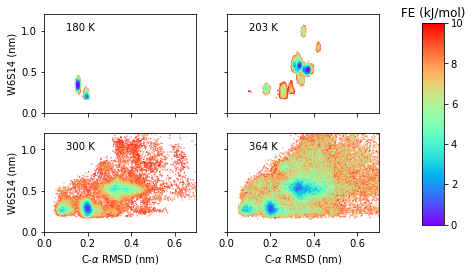

In [61]:
print "Plotting..."
start = time.time()

f, axarr = plt.subplots(2, 2,sharex='col', sharey='row')
cm = plt.cm.get_cmap('rainbow')
#f.tight_layout()

sc = custom_subplot(0,0,0)
custom_subplot(0,1,1)
custom_subplot(1,0,2)
custom_subplot(1,1,3)

cbar_ax = f.add_axes([1.0, 0.15, 0.05, 0.7])
clb = f.colorbar(sc,cax=cbar_ax)
clb.ax.set_title("FE (kJ/mol)")

for ax in axarr.flat:
    ax.label_outer()

f.savefig("2d_fes_"+str(property1)+"_"+str(property2)+".pdf",bbox_inches="tight")

end = time.time()
elapsed = end - start
print "Plotting took: "+str(round(elapsed,3))+" seconds"
